# Preprocess phage per phage LMM results 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from statsmodels.stats.multitest import multipletests

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "arial"
plt.rcParams["font.size"] = 15

sns.set_style("ticks")
np.random.seed(0)

In [54]:
results_dir = "C:/Users/hvays/These/projects/coli/manuscript/coli_phage_interactions_2023/dev/inference_bacteria/phage_per_phage/prepro"

all_res = []
for res_path in os.listdir(results_dir):
    if res_path.endswith("minfreq=8.tsv"):
        phage = res_path.split("__")[0]
        res_df = pd.read_csv(results_dir + "/" + res_path, sep="\t", header=None, names=["feature", "post_mean", "cred_interval_low", "cred_interval_high", "sample_size", "pMCMC"]).dropna()
        
        res_df["phage"] = phage
        res_df = res_df.loc[~res_df["feature"].isna()].sort_values("pMCMC")  # sort p-values for BH correction

        res_df["significance"] = res_df["pMCMC"] < 1e-3

        all_res.append(res_df)
all_res = pd.concat(all_res, axis=0).set_index("phage").reset_index()

print("#Significant hits:", all_res.loc[all_res["significance"]].shape[0])

all_res

do_save_cat_results = False
if do_save_cat_results:
    res_df = pd.read_csv("results/test.tsv", sep="\t")
    rej, pval_corr, _, _ = multipletests(res_df["pMCMC"].values, alpha=0.05, method="sh")
    pval_corr

#Significant hits: 11


In [55]:
signif_alpha = 1e-2
signif_hits = all_res.loc[all_res["pMCMC"] < signif_alpha]

signif_hits["feature_category"] = signif_hits["feature"].apply(lambda x: x[:-2] if not x.endswith("TRUE") else x[:-4]).replace({"OMPA99_": "OMPA", "O.type": "O-type", "MazEF": "Defense system"})
signif_hits["af_vs_ds"] = signif_hits["feature"].apply(lambda x: "Adsorption factor" if (x.startswith("LPS") or x.startswith("OMP") or x.startswith("ABC") or x.startswith("O.type") or x.startswith("Klebs")) else "Defense system")

signif_hits[:20]

C:\Users\hvays\AppData\Local\Temp\ipykernel_24368\205021637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signif_hits["feature_category"] = signif_hits["feature"].apply(lambda x: x[:-2] if not x.endswith("TRUE") else x[:-4]).replace({"OMPA99_": "OMPA", "O.type": "O-type", "MazEF": "Defense system"})
C:\Users\hvays\AppData\Local\Temp\ipykernel_24368\205021637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signif_hits["af_vs_ds"] = signif_hits["feature"].apply(lambda x: "Adsorption factor" if (x.st

,phage,feature,post_mean,cred_interval_low,cred_interval_high,sample_size,pMCMC,significance,feature_category,af_vs_ds
0,AL505_Ev3,YNCDOther,-189080.13,-315424.00,-84055.55,1800.0,0.00060,True,YNCDOth,Defense system
1,AL505_Ev3,OMPA99_16,283921.09,158392.94,394631.98,1927.0,0.00060,True,OMPA,Adsorption factor
109,AL505_Sd2,ABC_serotypeK1,184527.20,50029.10,330228.00,1800.0,0.00667,False,ABC_serotype,Adsorption factor
110,AL505_Sd2,O.typeO2,179229.90,44902.10,318887.40,1800.0,0.00889,False,O-type,Adsorption factor
218,AN17_P1,ABC_serotypeK5,236796.90,76656.20,390139.60,1973.0,0.00667,False,ABC_serotype,Adsorption factor
327,AN17_P8,ABC_serotypeK5,242412.60,93634.00,397694.80,1800.0,0.00111,False,ABC_serotype,Adsorption factor
654,AN24_P4,LPS_typeNo_waaL,221912.50,77260.40,350103.50,1076.0,0.00222,False,LPS_typeNo_wa,Adsorption factor
1196,BCH953_P5,O.typeO8,187187.70,51593.80,312371.30,1800.0,0.00889,False,O-type,Adsorption factor
1632,DIJ06_P1,ABC_serotypeK5,289512.70,154525.60,432546.40,1800.0,0.00111,False,ABC_serotype,Adsorption factor
1959,LF110_P1,LPS_typeR1,201832.90,91042.90,327593.00,1945.0,0.00111,False,LPS_type,Adsorption factor


C:\Users\hvays\AppData\Local\Temp\ipykernel_24368\4197905640.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=signif_hits.value_counts("feature").reset_index(), x="feature", y="count", palette=["#0c2471"])
C:\Users\hvays\AppData\Local\Temp\ipykernel_24368\4197905640.py:3: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=signif_hits.value_counts("feature").reset_index(), x="feature", y="count", palette=["#0c2471"])
C:\Users\hvays\AppData\Local\Temp\ipykernel_24368\4197905640.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")


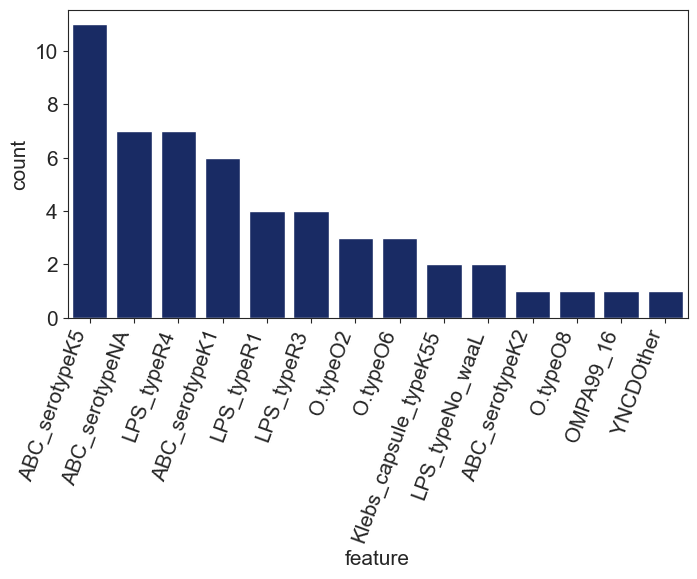

In [56]:
# results per feature
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax = sns.barplot(data=signif_hits.value_counts("feature").reset_index(), x="feature", y="count", palette=["#0c2471"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="right")

do_save = False
if do_save:
    plt.savefig("D:/These/50_quotidien/50_papers/2023_coli/figures/Figure 4 - Inference bacteria/data/analyze_LMM_results/LMM_results_per_feature.svg")

In [53]:
signif_hits.to_csv("C:/Users/hvays/These/projects/coli/manuscript/source_data/Figure_4/Figure_4_B.tsv", sep="\t", index=False)

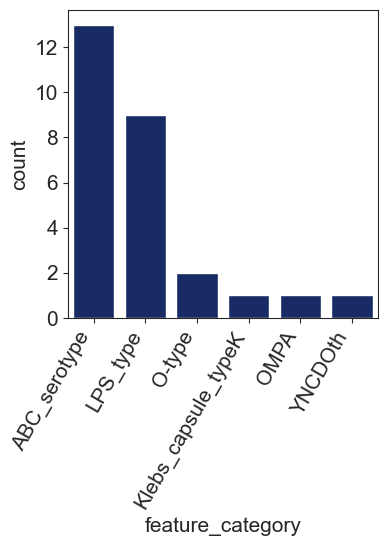

In [8]:
# results per feature category
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = sns.barplot(data=signif_hits.value_counts("feature_category").reset_index(), x="feature_category", y="count", palette=["#0c2471"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

do_save = False
if do_save:
    plt.savefig("D:/These/50_quotidien/50_papers/2023_coli/figures/Figure 4 - Inference bacteria/data/analyze_LMM_results/LMM_results_per_category.svg")

C:\Users\hvays\AppData\Local\Temp\ipykernel_24368\3117182428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=signif_hits.value_counts("af_vs_ds").reset_index(), x="af_vs_ds", y="count", palette=["#0c2471"])
C:\Users\hvays\AppData\Local\Temp\ipykernel_24368\3117182428.py:3: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=signif_hits.value_counts("af_vs_ds").reset_index(), x="af_vs_ds", y="count", palette=["#0c2471"])
C:\Users\hvays\AppData\Local\Temp\ipykernel_24368\3117182428.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")


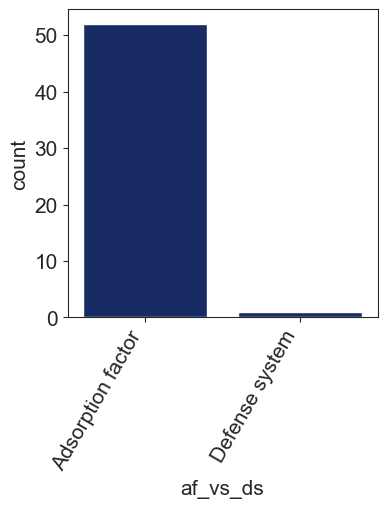

In [57]:
# results per AF vs. DS
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax = sns.barplot(data=signif_hits.value_counts("af_vs_ds").reset_index(), x="af_vs_ds", y="count", palette=["#0c2471"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

do_save = False
if do_save:
    plt.savefig("D:/These/50_quotidien/50_papers/2023_coli/figures/Figure 4 - Inference bacteria/data/analyze_LMM_results/LMM_results_af_vs_ds.svg")

In [52]:
signif_hits.value_counts("af_vs_ds").reset_index().to_csv("C:/Users/hvays/These/projects/coli/manuscript/source_data/Figure_4/Figure_4_A.tsv", sep="\t", index=False)

NameError: name 'bact_features' is not defined